In [41]:
import pandas as pd

df1 = pd.read_csv('../../data/baby_weights_dataset_clean.csv')
df2 = pd.read_csv('../../data/judge-without-labels_clean.csv')

In [42]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.datasets import  fetch_california_housing

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor,AdaBoostRegressor, GradientBoostingRegressor

In [43]:
X = df1.drop(columns =["BWEIGHT"])
y = df1["BWEIGHT"]

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [45]:
knn = KNeighborsRegressor(n_neighbors=10)

In [46]:
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=10)

In [47]:
print(f"The R2 of the model on the TEST set is: {knn.score(X_test, y_test): .2f}")

The R2 of the model on the TEST set is: -0.03


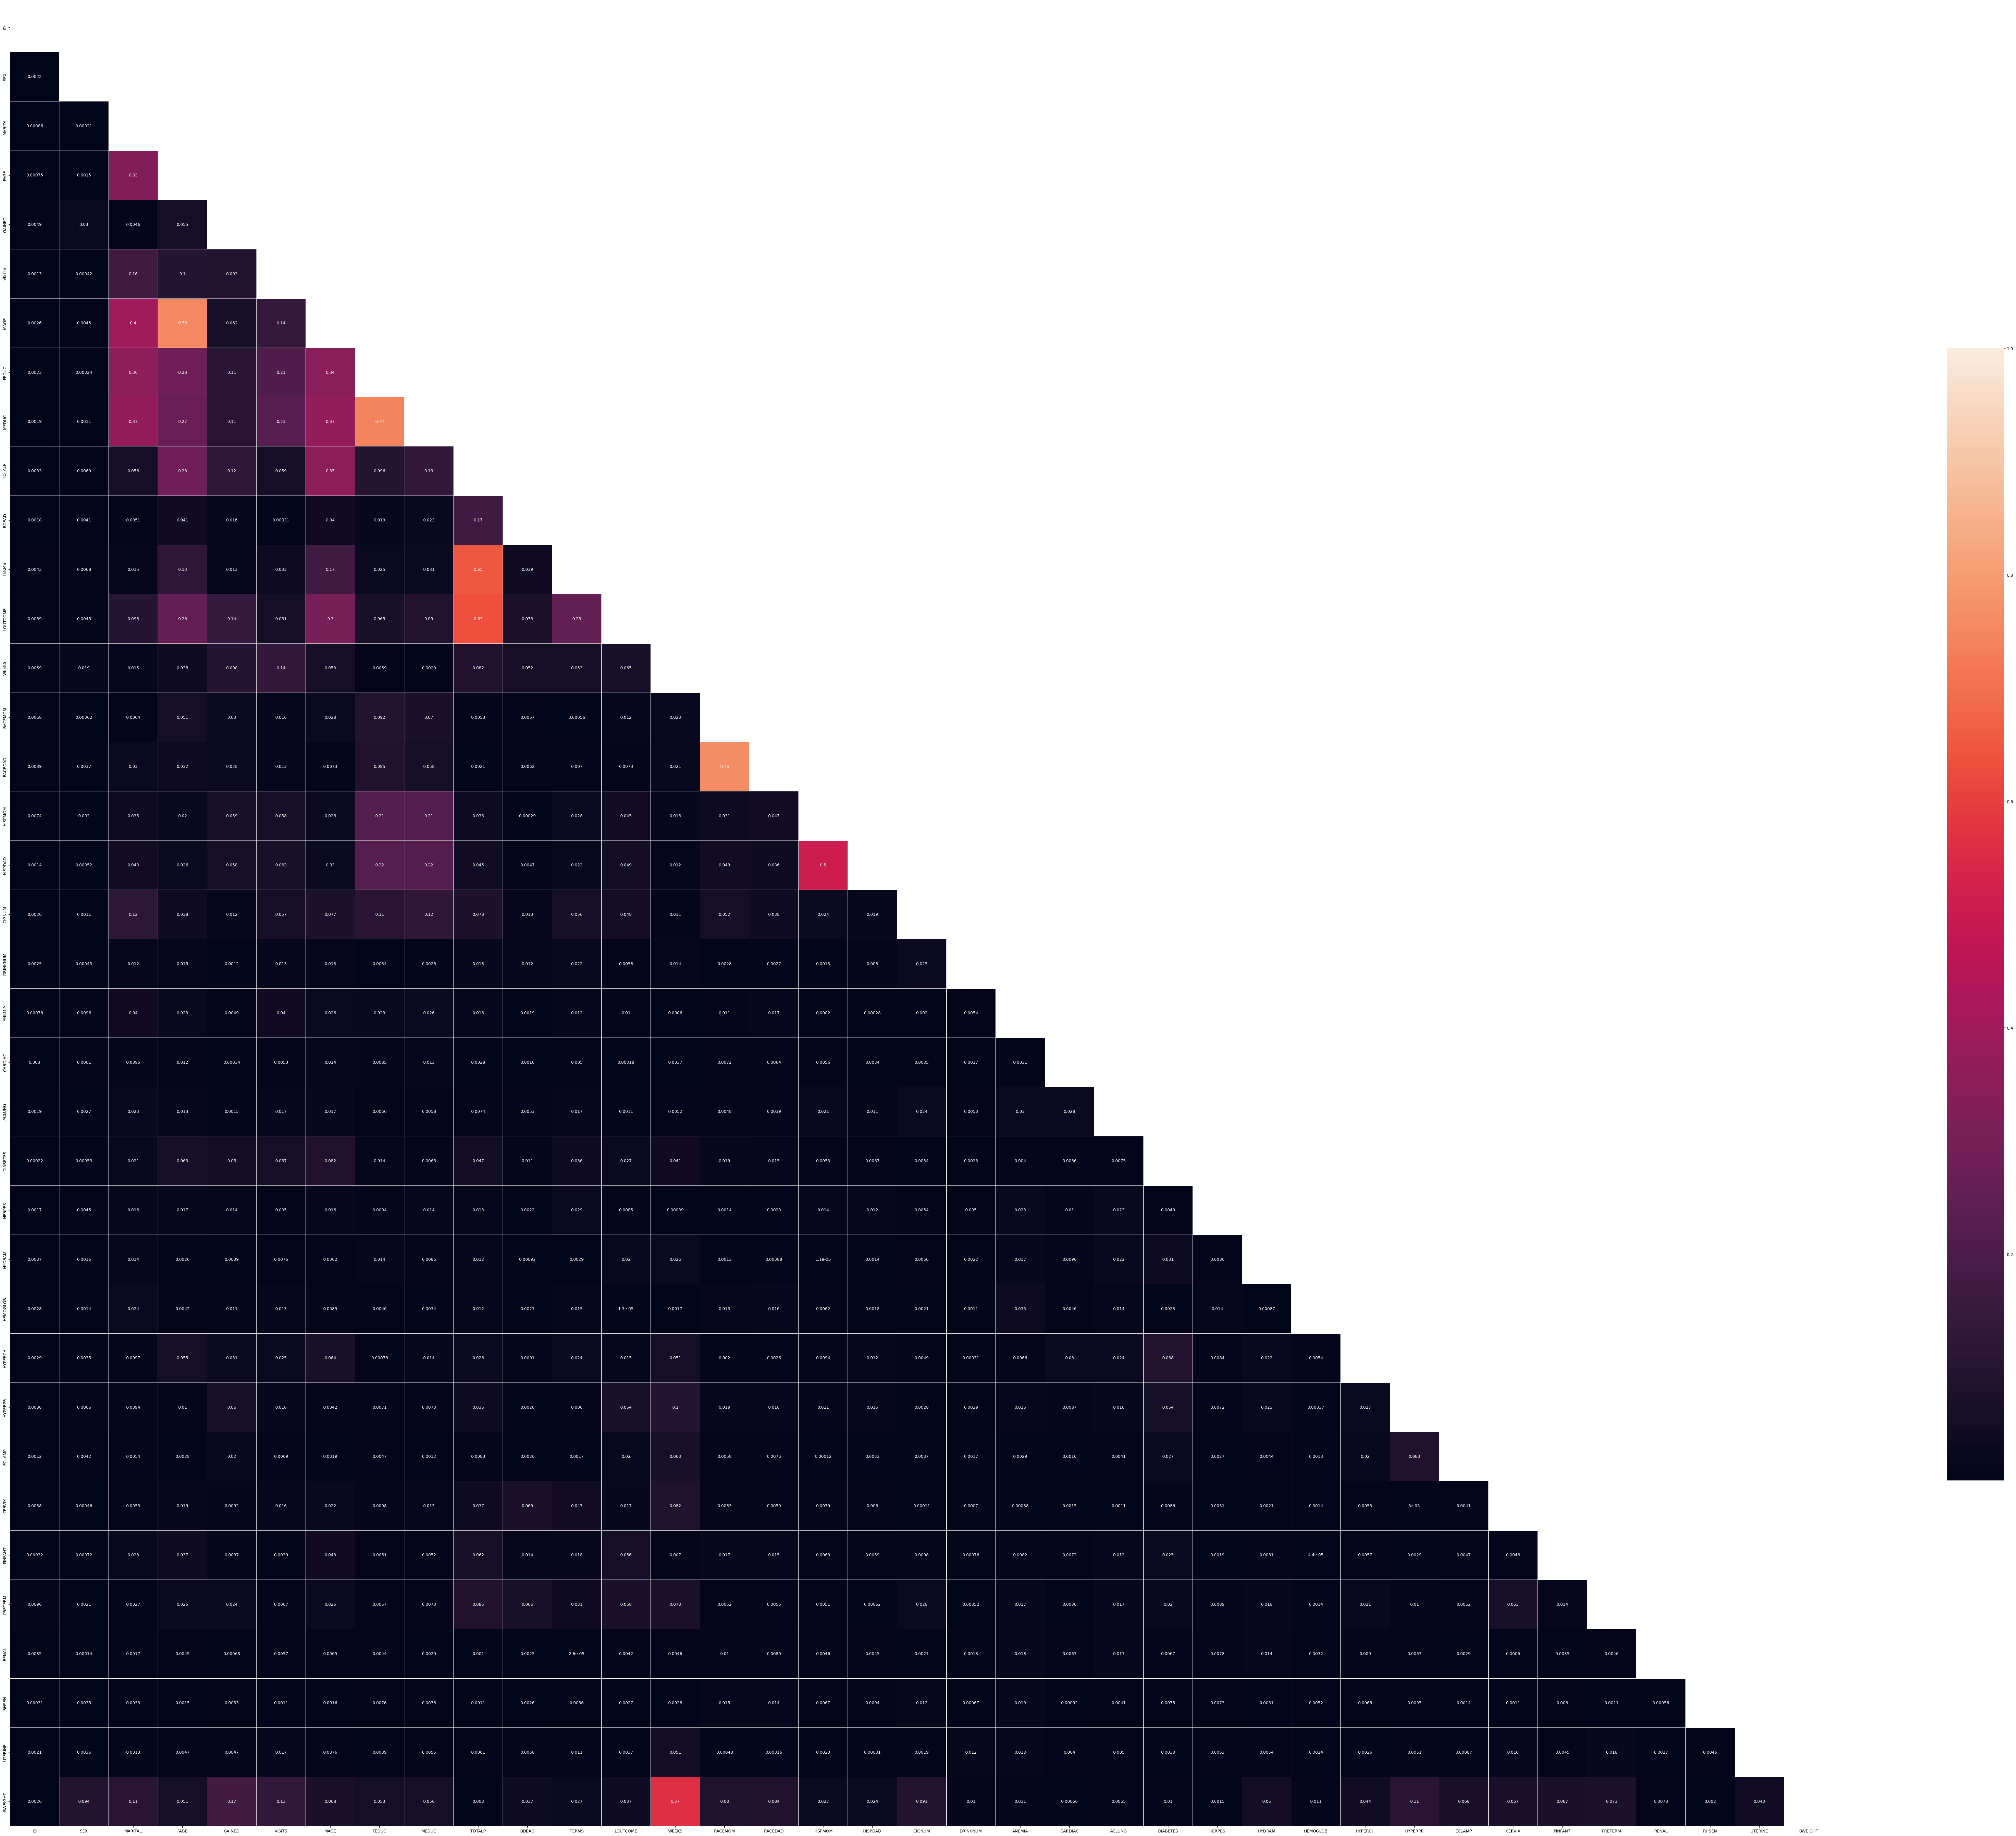

In [48]:
corr=np.abs(df1.corr()) # corr(x,y) = corr(y, x), corr(x,x) = 1

#Set up mask for triangle representation
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(100, 100))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,  vmax=1,square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = corr)

plt.show()

In [49]:
normalizer = MinMaxScaler()

In [50]:
normalizer.fit(X_train)

MinMaxScaler()

In [51]:
X_train_norm = normalizer.transform(X_train)

X_test_norm = normalizer.transform(X_test)

In [52]:
X_train_norm = pd.DataFrame(X_train_norm, columns=X_train.columns, index=X_train.index )
X_train_norm.head()

,ID,SEX,MARITAL,FAGE,GAINED,VISITS,MAGE,FEDUC,MEDUC,TOTALP,...,HEMOGLOB,HYPERCH,HYPERPR,ECLAMP,CERVIX,PINFANT,PRETERM,RENAL,RHSEN,UTERINE
75390,0.745922,0.0,1.0,0.416667,0.295918,0.285714,0.571429,0.882353,0.941176,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
98538,0.975009,0.0,0.0,0.250000,0.377551,0.285714,0.404762,0.705882,0.705882,0.052632,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37517,0.371240,1.0,1.0,0.133333,0.255102,0.204082,0.285714,0.352941,0.352941,0.105263,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
57173,0.565761,0.0,1.0,0.166667,0.377551,0.204082,0.380952,0.823529,0.823529,0.052632,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
74394,0.736089,0.0,0.0,0.350000,0.275510,0.306122,0.547619,0.823529,0.941176,0.052632,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [53]:
knn.fit(X_train_norm, y_train)

KNeighborsRegressor(n_neighbors=10)

In [54]:
X_test_norm = pd.DataFrame(X_test_norm, columns=X_test.columns, index=X_test.index)
X_test_norm.head()

,ID,SEX,MARITAL,FAGE,GAINED,VISITS,MAGE,FEDUC,MEDUC,TOTALP,...,HEMOGLOB,HYPERCH,HYPERPR,ECLAMP,CERVIX,PINFANT,PRETERM,RENAL,RHSEN,UTERINE
10466,0.103582,1.0,0.0,0.250000,0.255102,0.367347,0.380952,0.705882,0.705882,0.052632,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
47329,0.468303,0.0,1.0,0.383333,0.183673,0.285714,0.476190,0.294118,0.529412,0.052632,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
94702,0.936981,0.0,1.0,0.233333,0.367347,0.163265,0.380952,0.470588,0.705882,0.052632,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
82920,0.820440,1.0,0.0,0.333333,0.244898,0.244898,0.500000,1.000000,1.000000,0.105263,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
44242,0.437809,0.0,1.0,0.266667,0.081633,0.122449,0.285714,0.529412,0.352941,0.105263,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [55]:
print(f"The R2 of the model on the TEST set is: {knn.score(X_test_norm, y_test): .2f}")

The R2 of the model on the TEST set is:  0.26


In [62]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import pandas as pd

# Assuming 'df' is your DataFrame with the independent variables
X = add_constant(df1)  # Add constant column for intercept
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif)

    Variable         VIF
0      const  384.729632
1         ID    1.000496
2        SEX    1.017915
3    MARITAL    1.331775
4       FAGE    2.316019
5     GAINED    1.091315
6     VISITS    1.113852
7       MAGE    2.863246
8      FEDUC    2.350821
9      MEDUC    2.539734
10    TOTALP    3.486601
11     BDEAD    1.053407
12     TERMS    2.020104
13  LOUTCOME    1.839932
14     WEEKS    1.548637
15   RACEMOM    2.414393
16   RACEDAD    2.414421
17   HISPMOM    1.374256
18   HISPDAD    1.375134
19    CIGNUM    1.048060
20  DRINKNUM    1.002257
21    ANEMIA    1.007874
22   CARDIAC    1.002409
23    ACLUNG    1.006245
24  DIABETES    1.030718
25    HERPES    1.003949
26    HYDRAM    1.006175
27  HEMOGLOB    1.002961
28   HYPERCH    1.020013
29   HYPERPR    1.037905
30    ECLAMP    1.013450
31    CERVIX    1.017300
32   PINFANT    1.012026
33   PRETERM    1.022545
34     RENAL    1.001373
35     RHSEN    1.001401
36   UTERINE    1.003985
37   BWEIGHT    1.632550


In [206]:
def filter_vif_columns(df, threshold=2.0):
    vif_data = calculate_vif(df)
    
    # Filter out columns with VIF greater than the threshold
    features_to_keep = vif_data[vif_data["VIF"] < threshold]["Feature"]
    
    # Return the dataframe with only the columns with VIF less than the threshold
    df_filtered = df[features_to_keep]
    
    return df_filtered, vif_data

In [64]:
X_train_norm_updated_2 = X_train_norm.drop(columns=['ID', 'SEX', 'MARITAL', 'GAINED', 'VISITS', 'BDEAD', 'LOUTCOME', 
    'HISPMOM', 'HISPDAD', 'CIGNUM', 'DRINKNUM', 'ANEMIA', 'CARDIAC', 'ACLUNG', 
    'DIABETES', 'HERPES', 'HYDRAM', 'HEMOGLOB', 'HYPERCH', 'HYPERPR', 'ECLAMP', 
    'CERVIX', 'PINFANT', 'PRETERM', 'RENAL', 'RHSEN', 'UTERINE'], axis=1)
y_train_updated_2 = y_train.drop(columns=['ID', 'SEX', 'MARITAL', 'GAINED', 'VISITS', 'BDEAD', 'LOUTCOME', 
    'HISPMOM', 'HISPDAD', 'CIGNUM', 'DRINKNUM', 'ANEMIA', 'CARDIAC', 'ACLUNG', 
    'DIABETES', 'HERPES', 'HYDRAM', 'HEMOGLOB', 'HYPERCH', 'HYPERPR', 'ECLAMP', 
    'CERVIX', 'PINFANT', 'PRETERM', 'RENAL', 'RHSEN', 'UTERINE'], axis=1)
knn.fit(X_train_norm_updated_2, y_train_updated_2)

KNeighborsRegressor(n_neighbors=10)

In [68]:
X_test_norm_updated_2 = X_test_norm.drop(columns=['ID', 'SEX', 'MARITAL', 'GAINED', 'VISITS', 'BDEAD', 'LOUTCOME', 
    'HISPMOM', 'HISPDAD', 'CIGNUM', 'DRINKNUM', 'ANEMIA', 'CARDIAC', 'ACLUNG', 
    'DIABETES', 'HERPES', 'HYDRAM', 'HEMOGLOB', 'HYPERCH', 'HYPERPR', 'ECLAMP', 
    'CERVIX', 'PINFANT', 'PRETERM', 'RENAL', 'RHSEN', 'UTERINE'], axis=1)
y_test_updated_2 = y_test.drop(columns=['ID', 'SEX', 'MARITAL', 'GAINED', 'VISITS', 'BDEAD', 'LOUTCOME', 
    'HISPMOM', 'HISPDAD', 'CIGNUM', 'DRINKNUM', 'ANEMIA', 'CARDIAC', 'ACLUNG', 
    'DIABETES', 'HERPES', 'HYDRAM', 'HEMOGLOB', 'HYPERCH', 'HYPERPR', 'ECLAMP', 
    'CERVIX', 'PINFANT', 'PRETERM', 'RENAL', 'RHSEN', 'UTERINE'], axis=1)
print(f"The R2 of the model on the TEST set is: {knn.score(X_test_norm_updated_2, y_test_updated_2): .2f}")

The R2 of the model on the TEST set is:  0.34


In [70]:
lin_reg = LinearRegression()

In [72]:
lin_reg.fit(X_train_norm_updated_2, y_train_updated_2)

LinearRegression()

In [74]:
y_pred_test = lin_reg.predict(X_test_norm_updated_2)

# lin_reg.score(X_test_norm, y_test)

print(f"MAE {mean_absolute_error(y_pred_test, y_test_updated_2): .2f}") 
print(f"RMSE, {mean_squared_error(y_pred_test, y_test_updated_2, squared=False): .2f}") 
print(f"R2 score, {lin_reg.score(X_test_norm_updated_2, y_test_updated_2): .2f}")

MAE  0.84
RMSE,  1.07
R2 score,  0.34


### BAGGING

In [122]:
bagging_reg = BaggingRegressor(DecisionTreeRegressor(max_depth=20),
                               n_estimators=200,
                               max_samples = 1000) 

In [124]:
bagging_reg.fit(X_train_norm_updated_2, y_train)

BaggingRegressor(estimator=DecisionTreeRegressor(max_depth=20),
                 max_samples=1000, n_estimators=200)

In [125]:
y_pred_test_bag = bagging_reg.predict(X_test_norm_updated_2)

print(f"MAE {mean_absolute_error(y_pred_test_bag, y_test): .2f}")
print(f"RMSE {mean_squared_error(y_pred_test_bag, y_test, squared=False): .2f}")
print(f"R2 score {bagging_reg.score(X_test_norm_updated_2, y_test): .2f}")

MAE  0.79
RMSE  1.02
R2 score  0.40


### Forest

In [118]:
forest = RandomForestRegressor(n_estimators=100,
                             max_depth=20)

In [137]:
forest.fit(X_train_norm_updated_2, y_train)

RandomForestRegressor(max_depth=20)

In [131]:
y_pred_test_rf = forest.predict(X_test_norm_updated_2)

print(f"MAE, {mean_absolute_error(y_pred_test_rf, y_test): .2f}")
print(f"RMSE, {mean_squared_error(y_pred_test_rf, y_test, squared=False): .2f}")
print(f"R2 score, {forest.score(X_test_norm_updated_2, y_test): .2f}")

MAE,  0.81
RMSE,  1.04
R2 score,  0.38


### Gradient Boosting

In [143]:
gb_reg = GradientBoostingRegressor(max_depth=5,
                                   n_estimators=100)

In [145]:
gb_reg.fit(X_train_norm_updated_2, y_train)

GradientBoostingRegressor(max_depth=5)

In [146]:
y_pred_test_gb = gb_reg.predict(X_test_norm_updated_2)

print(f"MAE, {mean_absolute_error(y_pred_test_gb, y_test): .2f}")
print(f"RMSE, {mean_squared_error(y_pred_test_gb, y_test, squared=False): .2f}")
print(f"R2 score, {gb_reg.score(X_test_norm_updated_2, y_test): .2f}")

MAE,  0.79
RMSE,  1.02
R2 score,  0.41


### Adaptive Boosting

In [149]:
ada_reg = AdaBoostRegressor(DecisionTreeRegressor(max_depth=20),
                            n_estimators=100)

In [155]:
ada_reg.fit(X_train_norm_updated_2, y_train)

AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=20),
                  n_estimators=100)

In [156]:
y_pred_pred_ada = ada_reg.predict(X_test_norm_updated_2)

print(f"MAE, {mean_absolute_error(y_pred_pred_ada, y_test): .2f}")
print(f"RMSE, {mean_squared_error(y_pred_pred_ada, y_test, squared=False): .2f}")
print(f"R2 score, {ada_reg.score(X_test_norm_updated_2, y_test): .2f}")

MAE,  0.84
RMSE,  1.08
R2 score,  0.33


### GRID SEARCH

In [174]:
from sklearn.model_selection import GridSearchCV

grid = {"max_leaf_nodes": [250, 500, 1000],
        "max_depth":[10,30,50]}

In [176]:
dt = DecisionTreeRegressor()

In [192]:
model = GridSearchCV(estimator = dt, param_grid = grid, cv=5, verbose=10) 

In [194]:
model.fit(X_train_norm_updated_2, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START max_depth=10, max_leaf_nodes=250............................
[CV 1/5; 1/9] END max_depth=10, max_leaf_nodes=250;, score=0.382 total time=   0.5s
[CV 2/5; 1/9] START max_depth=10, max_leaf_nodes=250............................
[CV 2/5; 1/9] END max_depth=10, max_leaf_nodes=250;, score=0.400 total time=   0.7s
[CV 3/5; 1/9] START max_depth=10, max_leaf_nodes=250............................
[CV 3/5; 1/9] END max_depth=10, max_leaf_nodes=250;, score=0.407 total time=   0.8s
[CV 4/5; 1/9] START max_depth=10, max_leaf_nodes=250............................
[CV 4/5; 1/9] END max_depth=10, max_leaf_nodes=250;, score=0.401 total time=   0.6s
[CV 5/5; 1/9] START max_depth=10, max_leaf_nodes=250............................
[CV 5/5; 1/9] END max_depth=10, max_leaf_nodes=250;, score=0.386 total time=   0.7s
[CV 1/5; 2/9] START max_depth=10, max_leaf_nodes=500............................
[CV 1/5; 2/9] END max_depth=10, ma

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [10, 30, 50],
                         'max_leaf_nodes': [250, 500, 1000]},
             verbose=10)

In [204]:
model.best_params_

{'max_depth': 10, 'max_leaf_nodes': 250}

In [198]:
gb_reg = GradientBoostingRegressor(max_depth=10,
                                   n_estimators=250)

In [200]:
gb_reg.fit(X_train_norm_updated_2, y_train)

GradientBoostingRegressor(max_depth=10, n_estimators=250)

In [201]:
y_pred_test_gb = gb_reg.predict(X_test_norm_updated_2)

print(f"MAE, {mean_absolute_error(y_pred_test_gb, y_test): .2f}")
print(f"RMSE, {mean_squared_error(y_pred_test_gb, y_test, squared=False): .2f}")
print(f"R2 score, {gb_reg.score(X_test_norm_updated_2, y_test): .2f}")

MAE,  0.82
RMSE,  1.05
R2 score,  0.37
